In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

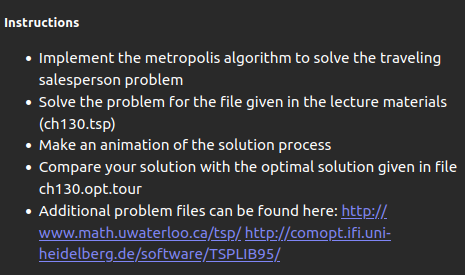

In [ ]:
def read_tsp(filename="ch130.tsp"):
    x, y = np.loadtxt(filename, delimiter=' ', comments="EOF",
                      skiprows=6, usecols=(1, 2), unpack=True)
    coords = np.column_stack((x, y))
    print("# cities read: %i" % len(coords))
    # for i in range(len(x)):
    #     xi = x[i]
    #     yi = y[i]
    #     print("(x_%i, y_%i) = (%f, %f)" % (i, i, xi, yi))

    return coords

def read_opt_tour(filename="ch130.opt.tour"):
    opttour = np.loadtxt(filename, delimiter=' ', comments="-1",
                         dtype=int, skiprows=5, usecols=(0), unpack=True)
    print("# optimal tour length: %i" % len(opttour))
    return opttour - 1 

def tour_length(tour, coords):
    dist = np.sqrt(np.sum((coords[tour] - coords[np.roll(tour, -1)])**2, axis=1))
    return np.sum(dist)

def metropolis_tsp(coords, T_start=100, T_end=1e-6, alpha=0.9995, max_iter=1000000):
    n = len(coords)
    current_tour = np.arange(n)
    np.random.shuffle(current_tour)
    current_length = tour_length(current_tour, coords)
    T = T_start

    history = [(current_tour.copy(), current_length)]

    for step in range(max_iter):
        new_tour = current_tour.copy()

        if step % 2 == 0:
            # Move 1: Swap two random cities
            i, j = random.sample(range(n), 2)
            new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
        else:
            # Move 2: Reverse a random subarray
            i1, i2 = sorted(random.sample(range(n), 2))
            new_tour[i1:i2+1] = new_tour[i1:i2+1][::-1]

        new_length = tour_length(new_tour, coords)
        delta = new_length - current_length

        if delta < 0 or np.exp(-delta / T) > np.random.rand():
            current_tour = new_tour
            current_length = new_length
            history.append((current_tour.copy(), current_length))

        # Cooling rate -> How likely does the algo accept a new "worse" solution
        T *= alpha
        if T < T_end:
            break

    return current_tour, current_length, history

def animate_tour(history, coords, interval=100, filename="tsp_solution.mp4"):

    fig, ax = plt.subplots()
    line, = ax.plot([], [], 'o-', lw=2)
    ax.set_xlim(np.min(coords[:,0]) - 10, np.max(coords[:,0]) + 10)
    ax.set_ylim(np.min(coords[:,1]) - 10, np.max(coords[:,1]) + 10)
    ax.set_title("Traveling Salesperson - Metropolis Algorithm")

    def update(frame):
        tour, length = history[frame]
        tour = np.append(tour, tour[0])  # to complete the loop
        line.set_data(coords[tour, 0], coords[tour, 1])
        ax.set_title(f"Step {frame}/{len(history)} | Length: {length:.2f}")
        return line,

    ani = animation.FuncAnimation(fig, update, frames=len(history), interval=interval, blit=True)

    if filename.endswith('.mp4'):
        ani.save(filename, writer='ffmpeg', fps=1000//interval)


    print(f"Animation saved to {filename}")
    plt.close(fig)




In [31]:
coords = read_tsp("ch130.tsp")
opt_tour = read_opt_tour("ch130.opt.tour")
opt_length = tour_length(opt_tour, coords)
print("Optimal tour length: %.2f" % opt_length)

final_tour, final_length, history = metropolis_tsp(coords)
print("Final tour length (Metropolis): %.2f" % final_length)

animate_tour(history, coords)

# cities read: 130
# optimal tour length: 130
Optimal tour length: 6110.86
Final tour length (Metropolis): 7123.47
Animation saved to tsp_solution.mp4
